In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#or just- model = LogisticRegression() as scikit learns automatically runs ova(except for SVM for which it uses OVO)
#when it detets that a binary classifier is used for multiclass classification

In [8]:
#from sklearn.multiclass import OneVsRestClassifier
# define the ovr strategy
#ovr = OneVsRestClassifier(model)

In [9]:
# fit model
#ovr.fit(X_train, y_train)

In [10]:
# make predictions
#yhat = ovr.predict(digits.data[0:5])

In [11]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [13]:
model.score(X_test, y_test)

0.9527777777777777

In [14]:
y_predicted = model.predict(X_test)

In [15]:
y_score = model.predict_proba(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 21,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 42,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  1],
       [ 0,  2,  1,  1,  0,  1,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 27]])

In [17]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.97      0.93        33
           2       0.91      0.95      0.93        22
           3       0.98      0.98      0.98        43
           4       1.00      0.95      0.98        43
           5       0.95      0.95      0.95        40
           6       1.00      0.97      0.99        37
           7       0.97      0.97      0.97        32
           8       0.93      0.89      0.91        44
           9       0.87      0.90      0.89        30

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [18]:
from sklearn.metrics import precision_recall_curve, roc_curve,roc_auc_score,auc

In [19]:
roc_auc_score(y_test,y_score,multi_class = 'ovr')

0.9990775615456577

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,digits.data,digits.target,cv = 5,scoring ='roc_auc_ovo').mean()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9956839530892122

In [21]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
y = digits.target
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

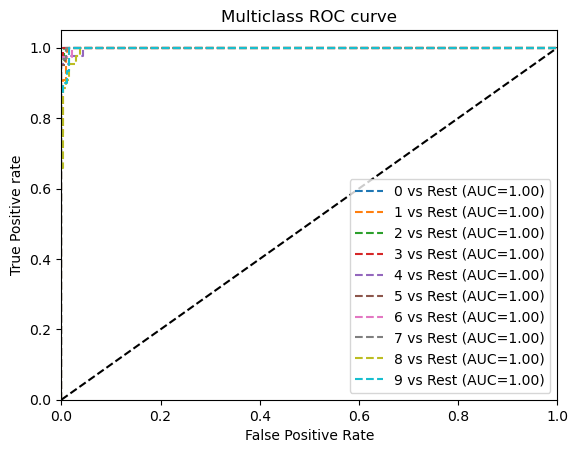

In [22]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

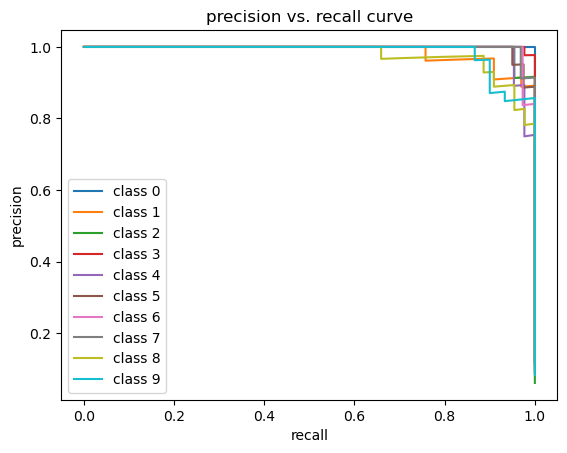

In [23]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [24]:
from sklearn.svm import SVC
model2 = SVC(decision_function_shape='ovo', probability = True)

In [25]:
model2.fit(X_train, y_train)

SVC(decision_function_shape='ovo', probability=True)

In [26]:
y_predicted = model2.predict(X_test)

In [27]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.94      1.00      0.97        33
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        43
           4       1.00      0.95      0.98        43
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        32
           8       0.98      0.93      0.95        44
           9       0.91      0.97      0.94        30

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [28]:
y_score = model2.predict_proba(X_test)

In [29]:
roc_auc_score(y_test,y_score,multi_class = 'ovo')

0.9996429722454211

In [30]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.94      1.00      0.97        33
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        43
           4       1.00      0.95      0.98        43
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        32
           8       0.98      0.93      0.95        44
           9       0.91      0.97      0.94        30

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



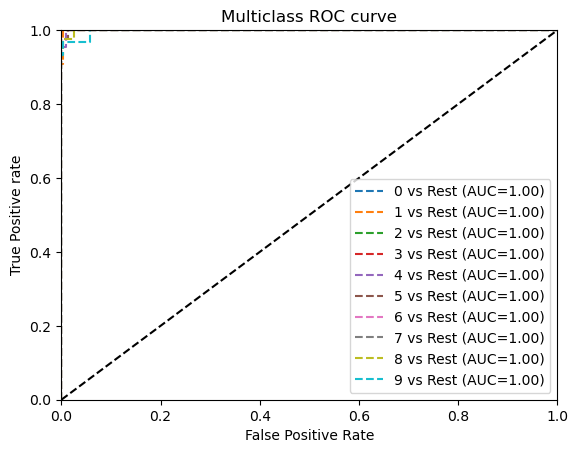

In [31]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

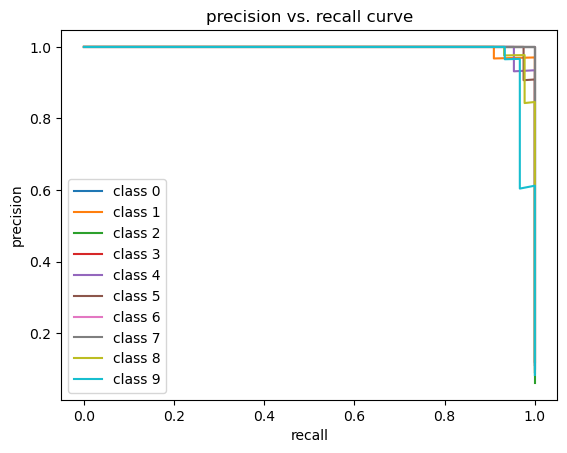

In [32]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [33]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()

In [34]:
model3.fit(X_train, y_train)

GaussianNB()

In [35]:
y_predicted = model3.predict(X_test)

In [36]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.91      0.61      0.73        33
           2       0.93      0.64      0.76        22
           3       0.92      0.56      0.70        43
           4       0.97      0.77      0.86        43
           5       0.95      0.88      0.91        40
           6       0.95      1.00      0.97        37
           7       0.69      0.97      0.81        32
           8       0.53      0.95      0.68        44
           9       0.85      0.73      0.79        30

    accuracy                           0.82       360
   macro avg       0.87      0.81      0.82       360
weighted avg       0.86      0.82      0.82       360



In [37]:
y_score = model3.predict_proba(X_test)

In [38]:
roc_auc_score(y_test,y_score,multi_class = 'ovo')

0.9767108796038073

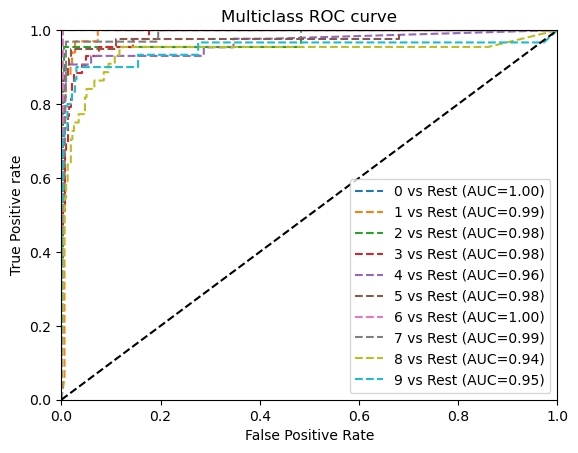

In [39]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

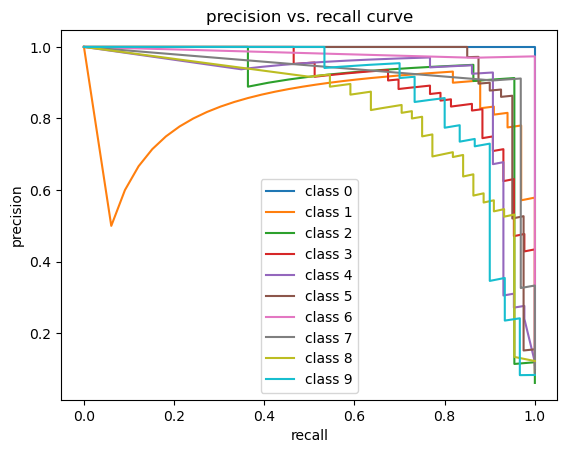

In [40]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()